# **QUESTION ONE**

# **1.1**

In [95]:
# import dataset
import pandas as pd #import and transform-data import seaborn as sn #Generates visuals
import seaborn as sn
import numpy as np #structuring data
import matplotlib as mat #Generates visuals
data2 = pd.read_csv('Question1.csv')

In [96]:
data2

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


In [97]:
data2.duplicated().sum()

617

In [98]:
data1=data2.drop_duplicates()
data1.duplicated().sum()

0

In [99]:
data1.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              25
dtype: int64

In [100]:
#data= data1.fillna(method='backfill')
data = data1.fillna(data1.mode().iloc[0])

In [101]:
#drop missing values
#data = data1.dropna()
data.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [102]:
data.nunique()

Department           42
Department_Name      42
Division            627
Gender                2
Base_Salary        3470
Overtime_Pay       5566
Longevity_Pay      1113
Grade                98
dtype: int64

In [103]:
# Display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Department':
['ABS' 'BOA' 'BOE' 'CAT' 'CCL' 'CEC' 'CEX' 'COR' 'CUS' 'DEP' 'DGS' 'DHS'
 'DOT' 'DPS' 'ECM' 'FIN' 'FRS' 'HCA' 'HHS' 'HRC' 'IGR' 'LIB' 'MPB' 'NDA'
 'OAG' 'OAS' 'OCP' 'OFR' 'OGM' 'OHR' 'OIG' 'OLO' 'OLR' 'OMB' 'ORE' 'PIO'
 'POL' 'PRO' 'REC' 'SHF' 'TBS' 'ZAH']


Unique values in column 'Department_Name':
['Alcohol Beverage Services' 'Board of Appeals Department'
 'Board of Elections' "County Attorney's Office" 'County Council'
 'Community Engagement Cluster' 'Offices of the County Executive'
 'Correction and Rehabilitation' 'Community Use of Public Facilities'
 'Department of Environmental Protection' 'Department of General Services'
 'Office of Emergency Management and Homeland Security'
 'Department of Transportation' 'Department of Permitting Services'
 'Ethics Commission' 'Department of Finance' 'Fire and Rescue Services'
 'Department of Housing and Community Affairs'
 'Department of Health and Human Services' 'Office of Human Rights'
 'Office of I

In [104]:
data.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,9674.000000,9674.000000,9674.000000
mean,90725.643578,8594.192753,1573.027926
std,30774.245561,16879.186881,3256.385047
min,11147.240000,0.000000,0.000000
25%,71147.363700,0.000000,0.000000
50%,87328.000000,518.325000,0.000000
75%,108084.000000,10237.242500,1334.992500
max,292000.000000,227428.990000,20279.460000


In [105]:
# Calculate descriptive statistics
desc = data.describe()

# Calculate mode
mode = data.mode().iloc[0]

# Add mode to the descriptive statistics
desc.loc['mode'] = mode

print(desc)

         Base_Salary   Overtime_Pay  Longevity_Pay
count    9674.000000    9674.000000    9674.000000
mean    90725.643578    8594.192753    1573.027926
std     30774.245561   16879.186881    3256.385047
min     11147.240000       0.000000       0.000000
25%     71147.363700       0.000000       0.000000
50%     87328.000000     518.325000       0.000000
75%    108084.000000   10237.242500    1334.992500
max    292000.000000  227428.990000   20279.460000
mode   108084.000000       0.000000       0.000000


In [106]:
# Create a new feature that combines all the salaries
data['Total_Salary'] = data['Base_Salary'] + data['Overtime_Pay'] + data['Longevity_Pay']
data['Average'] = data['Total_Salary']/3

# Display the first few rows to verify the new feature
# print(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Salary']].head())
data.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary,Average
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000,58624.333333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360,48537.786667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000,45656.666667
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694,30640.898000
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380,28553.793333


In [107]:
import matplotlib.pyplot as plt

# **Overall Distribution of total salary by gender**

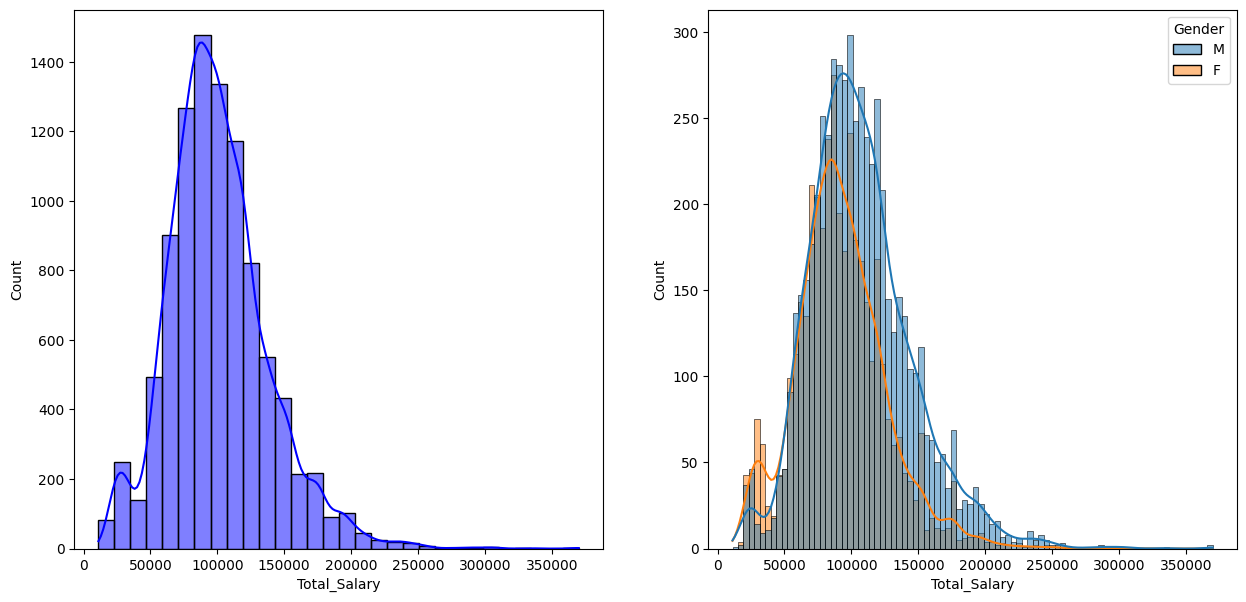

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sn.histplot(data=data, x='Total_Salary', bins=30, kde=True, color='b')
plt.subplot(122)
sn.histplot(data=data, x='Total_Salary', kde=True, hue='Gender')
plt.show()

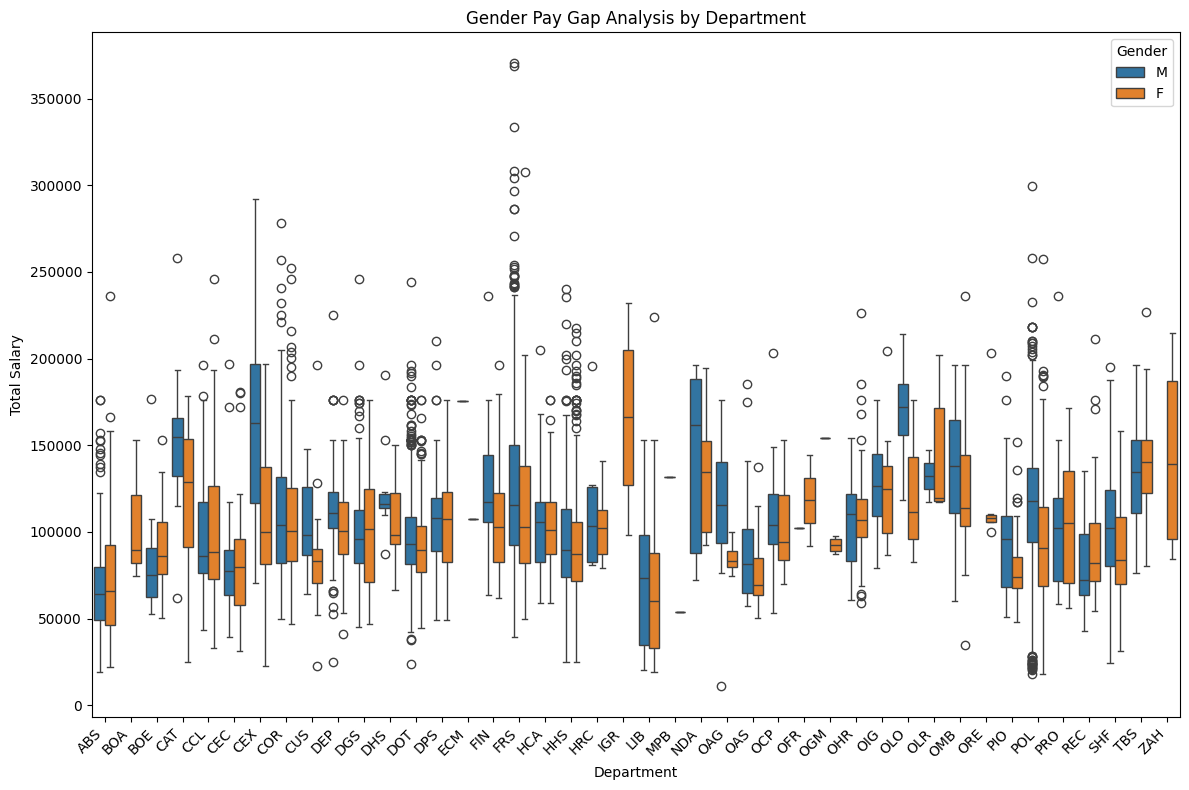

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Department', y='Total_Salary', hue='Gender', data=data)

# Customize plot
plt.title('Gender Pay Gap Analysis by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
# Create separate box plots for each department
departments = data['Department'].unique()

# Show plot
plt.tight_layout()
plt.show()

Overall Gneder Pay Analysis for Division

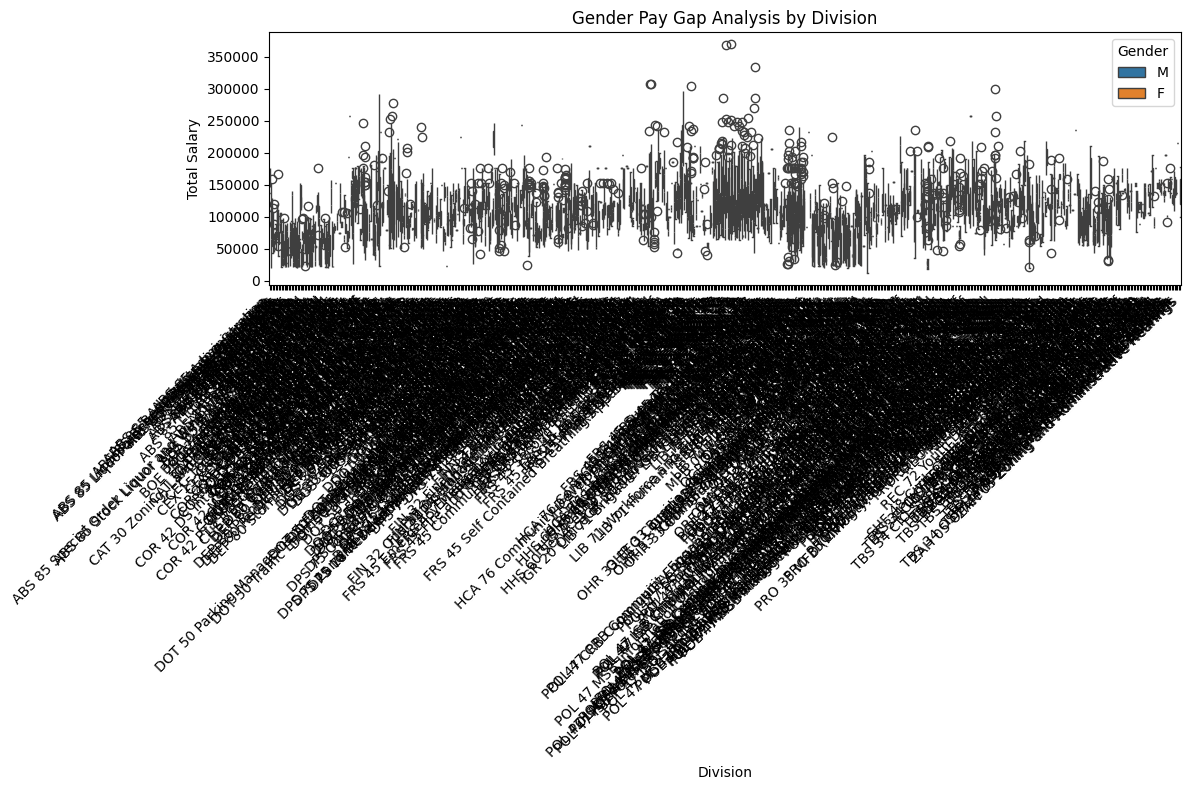

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Division', y='Total_Salary', hue='Gender', data=data)

# Customize plot
plt.title('Gender Pay Gap Analysis by Division')
plt.xlabel('Division')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')


# Show plot
plt.tight_layout()
plt.show()

Gender pay gap analysis for only 30 grades. 

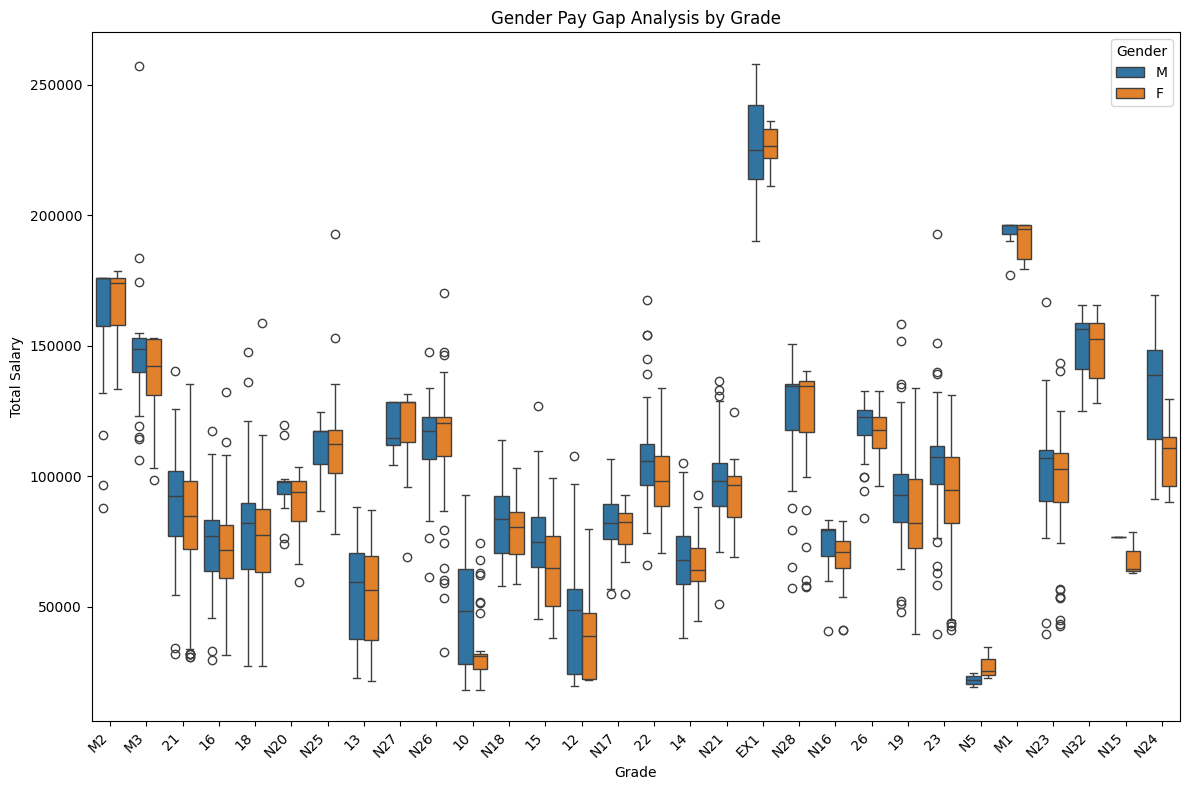

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select 30 unique grades
selected_grades = data['Grade'].unique()[:30]

# Filter the data to include only the selected grades
filtered_data = data[data['Grade'].isin(selected_grades)]

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Grade', y='Total_Salary', hue='Gender', data=filtered_data)

# Customize plot
plt.title('Gender Pay Gap Analysis by Grade')
plt.xlabel('Grade')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show plot
plt.tight_layout()
plt.show()

Group data?

In [110]:
# Group data by Gender, Division, Grade, and Department
grouped_data = data.groupby(['Gender', 'Division', 'Grade', 'Department']).size().reset_index(name='Count')

# Display the grouped data
grouped_data.head()

,Gender,Division,Grade,Department,Count
0,F,ABS 85 Administration,M3,ABS,1
1,F,ABS 85 Administrative Services,16,ABS,2
2,F,ABS 85 Administrative Services,18,ABS,2
3,F,ABS 85 Administrative Services,21,ABS,4
4,F,ABS 85 Administrative Services,N26,ABS,1


In [111]:
# Calculate the mode for each column
mode_values = data.mode().iloc[0]

# Initialize a dictionary to store the count of mode occurrences
mode_counts = {}

# Iterate through each column and count the occurrences of the mode value
for column in data.columns:
    mode_counts[column] = data[column].value_counts().get(mode_values[column], 0)

print(mode_counts)

{'Department': 1702, 'Department_Name': 1702, 'Division': 352, 'Gender': 5687, 'Base_Salary': 372, 'Overtime_Pay': 4065, 'Longevity_Pay': 6950, 'Grade': 711, 'Total_Salary': 78, 'Average': 78}


In [112]:
unique_base_salaries = data['Base_Salary'].nunique()
print(unique_base_salaries)

3470


In [113]:
data.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
Total_Salary       float64
Average            float64
dtype: object

# **Distribution of total salaries for Each Gender Across All Departments, Grades, and Divisions**

C:\Users\seth\AppData\Local\Temp\ipykernel_20212\2992824753.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


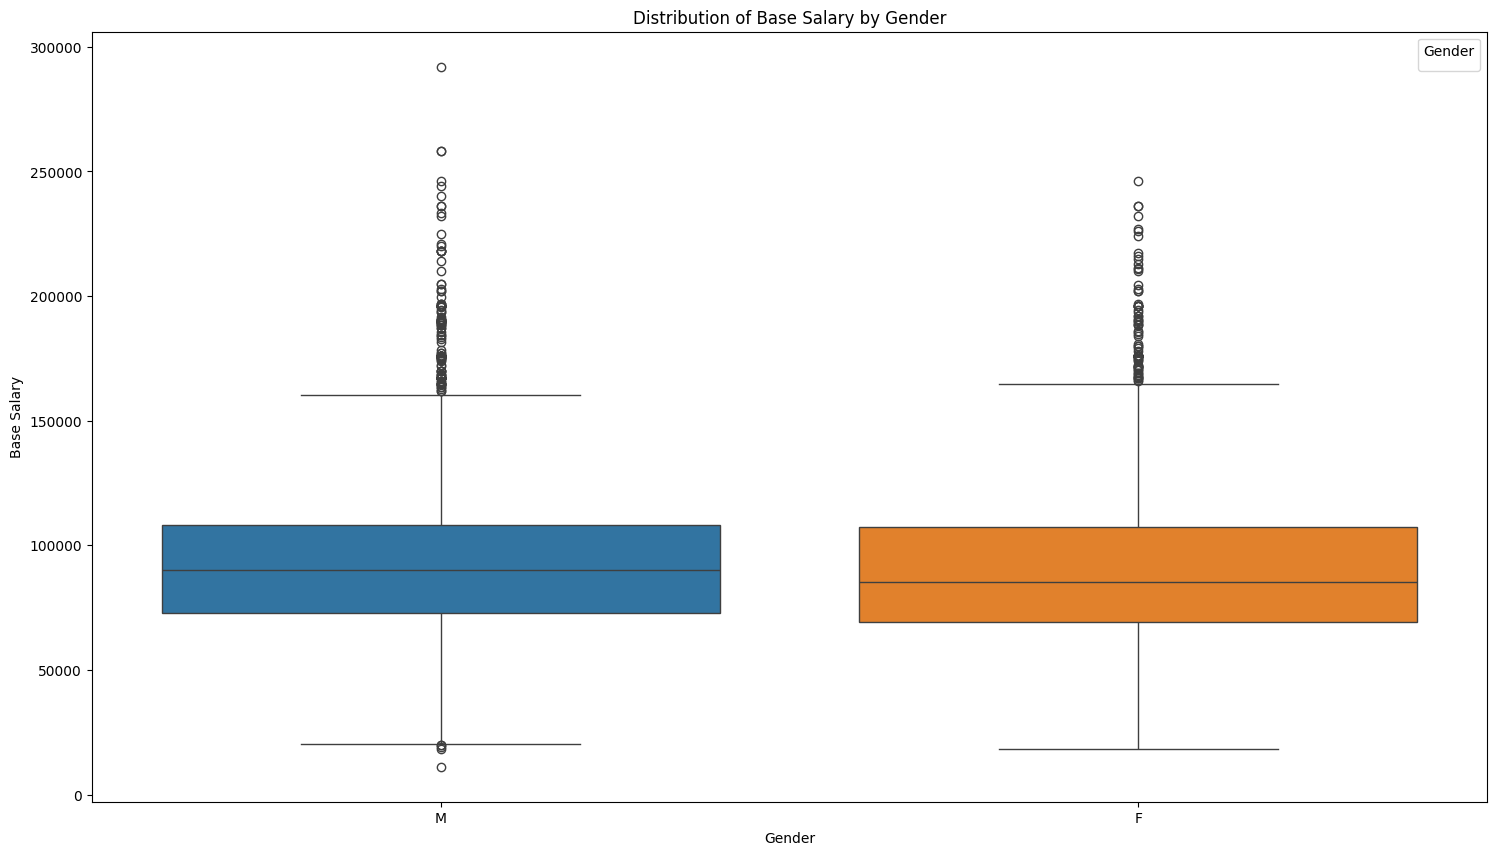

C:\Users\seth\AppData\Local\Temp\ipykernel_20212\2992824753.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


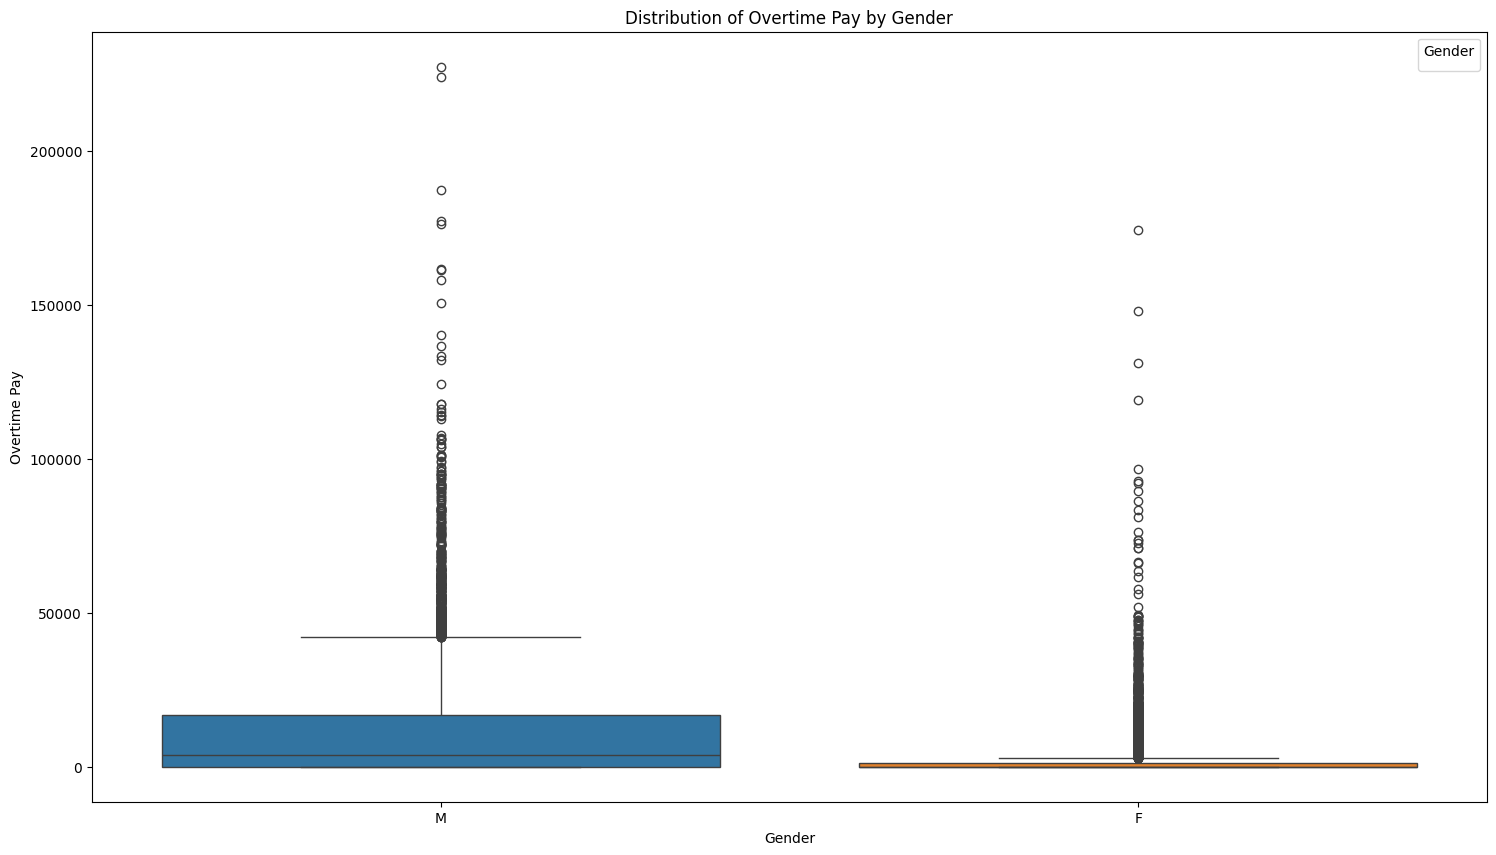

C:\Users\seth\AppData\Local\Temp\ipykernel_20212\2992824753.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


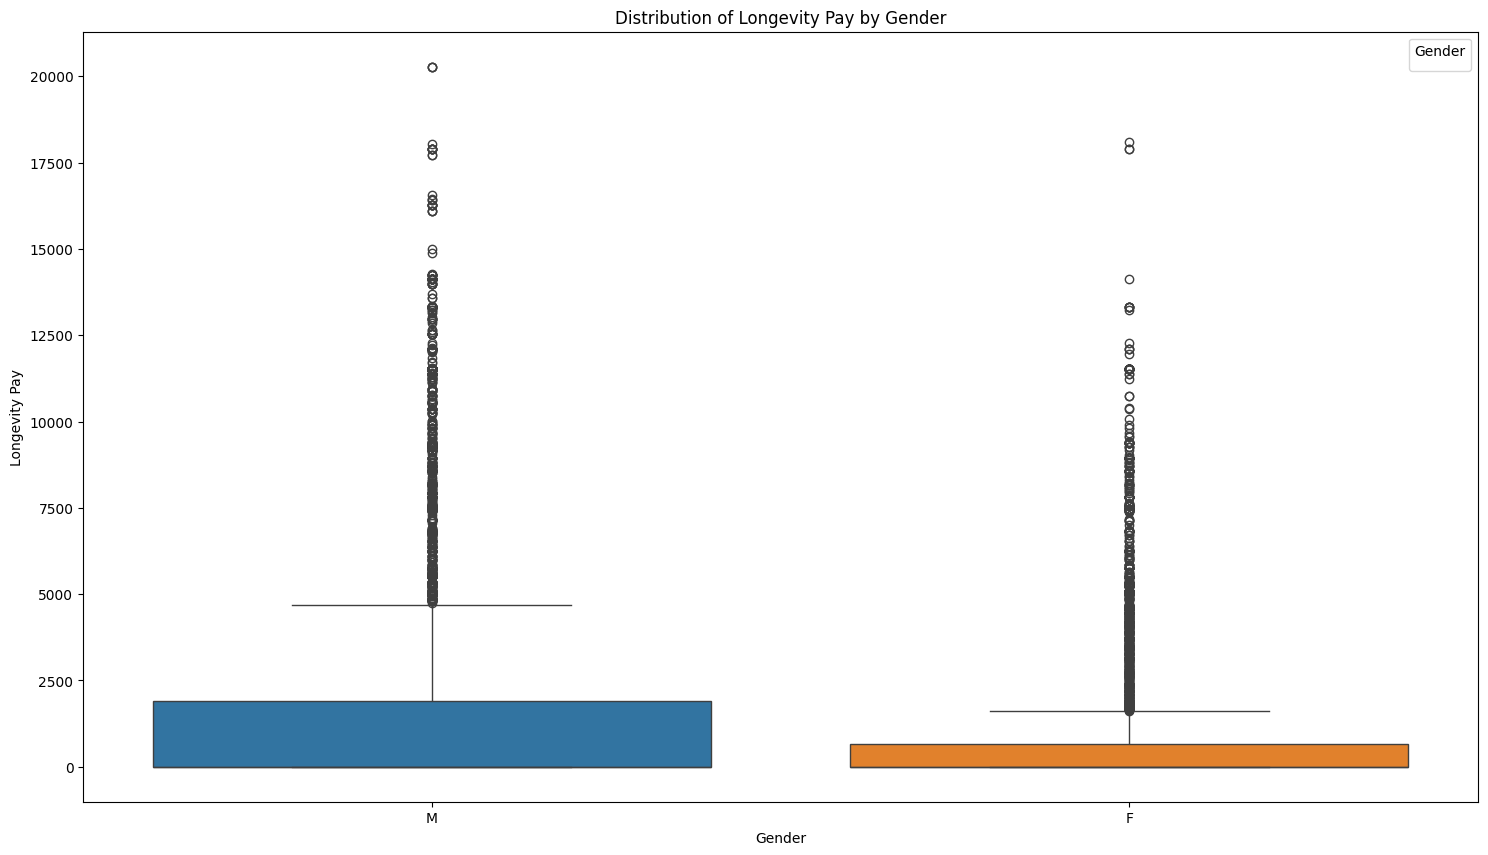

In [116]:
# Visualize the distribution of salaries for each gender within each subgroup (division, grade, department)
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Base_Salary', hue='Gender', data=data)
plt.title('Distribution of Base Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Base Salary')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Overtime_Pay for each gender
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Overtime_Pay', hue='Gender', data=data)
plt.title('Distribution of Overtime Pay by Gender')
plt.xlabel('Gender')
plt.ylabel('Overtime Pay')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Longevity_Pay for each gender
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Longevity_Pay', hue='Gender', data=data)
plt.title('Distribution of Longevity Pay by Gender')
plt.xlabel('Gender')
plt.ylabel('Longevity Pay')
plt.legend(title='Gender')
plt.show()

In [117]:
data.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
Total_Salary       float64
Average            float64
dtype: object

In [118]:
data['Gender'].value_counts()

Gender
M    5687
F    3987
Name: count, dtype: int64

In [119]:
data['Grade'].value_counts()

Grade
T1     711
P4     676
16     583
F3     488
24     458
      ... 
N38      1
N33      1
N36      1
MD2      1
N35      1
Name: count, Length: 98, dtype: int64

# **1.2**

In [120]:
# Summary statistics
print(data.describe())

         Base_Salary   Overtime_Pay  Longevity_Pay   Total_Salary  \
count    9674.000000    9674.000000    9674.000000    9674.000000   
mean    90725.643578    8594.192753    1573.027926  100892.864258   
std     30774.245561   16879.186881    3256.385047   37465.460941   
min     11147.240000       0.000000       0.000000   11147.240000   
25%     71147.363700       0.000000       0.000000   76624.287500   
50%     87328.000000     518.325000       0.000000   97161.310000   
75%    108084.000000   10237.242500    1334.992500  120333.000000   
max    292000.000000  227428.990000   20279.460000  370240.930000   

             Average  
count    9674.000000  
mean    33630.954753  
std     12488.486980  
min      3715.746667  
25%     25541.429167  
50%     32387.103333  
75%     40111.000000  
max    123413.643333  


In [121]:
# Group data by Department and Division
gr_data = data.groupby('Department')[['Base_Salary', 'Longevity_Pay', 'Overtime_Pay', 'Total_Salary']].describe()

# Display the grouped data
gr_data

Base_Salary                                            \
                 count           mean           std          min   
Department                                                         
ABS              459.0   64722.536091  29626.276916   19252.5000   
BOA                3.0  104482.526933  42371.078284   74404.5808   
BOE               34.0   85517.136856  27670.574186   50438.0000   
CAT               74.0  130264.998488  39325.918962   25210.5000   
CCL              117.0  101172.051873  39903.645924   32842.0000   
CEC              103.0   75934.315712  31294.977033   31500.4700   
CEX               47.0  128811.643806  56698.650652   22525.7844   
COR              513.0   84960.180202  23826.077525   46862.7300   
CUS               28.0   93023.134818  33355.455517   22639.0000   
DEP              178.0  104563.721137  26560.620956   25210.5000   
DGS              390.0   91661.476491  27383.558173   44862.3785   
DHS               19.0  113653.769468  29100.547640   66303.5100   
DOT             1274.0   81622.493072  21475.038144   23932.0995   
DPS              228.0  103980.580748  26971.402721   49329.4028   
ECM                2.0  141388.425000  48113.560646  107367.0000   
FIN              112.0  114253.147319  33298.241768   61670.2249   
FRS             1361.0   98188.564701  24457.811744   39444.0000   
HCA               95.0  102979.771177  28000.738563   58718.6033   
HHS             1600.0   88806.986988  26591.906687   25210.5000   
HRC               11.0  108182.204118  35384.626093   78943.0244   
IGR                4.0  165196.750000  60117.264915   98228.0000   
LIB              421.0   64620.236973  33237.214862   19255.0000   
MPB                2.0   92906.846950  55151.363397   53908.9439   
NDA               18.0  135776.816339  42988.571252   72000.0000   
OAG               11.0  100612.172064  44077.364495   11147.2400   
OAS               77.0   76513.615360  24377.618703   49545.9400   
OCP               18.0  106213.422522  35576.230621   53001.9849   
OFR                3.0  112777.666667  27781.365991   92000.0000   
OGM                5.0  104599.236000  27903.324775   87000.0000   
OHR               63.0  109212.501744  30621.413844   58822.1550   
OIG               19.0  126224.102832  31572.542463   79367.9400   
OLO               15.0  133615.982687  37967.301320   82656.6250   
OLR                7.0  141485.288571  33944.347434  117424.0000   
OMB               40.0  127234.698698  38856.271622   34684.2042   
ORE                6.0  122101.773167  39850.177231   98228.0000   
PIO               65.0   87183.621523  29961.796206   47833.0000   
POL             1702.0   93917.510172  30409.893839   18257.5000   
PRO               34.0  105796.360556  40311.100240   56333.0000   
REC              184.0   84345.027278  23967.534926   42577.0000   
SHF              184.0   90298.364421  25574.000923   24651.3235   
TBS              144.0  132176.573612  28617.925427   76292.0339   
ZAH                4.0  143900.490725  62852.346888   84365.5529   

                                                                   \
                      25%           50%            75%        max   
Department                                                          
ABS          46468.628150   61240.00000   77548.906050  236000.00   
BOA          80253.790400   86103.00000  119521.500000  152940.00   
BOE          64693.000000   78947.00000   98228.000000  176948.00   
CAT         104640.520900  137830.26175  158802.000000  258000.00   
CCL          74333.000000   86103.00000  124333.000000  246162.47   
CEC          57036.208350   65083.50000   87305.220000  197000.00   
CEX          88051.500000  109575.94000  175334.800000  292000.00   
COR          67582.000000   84577.09500   97488.398800  221000.00   
CUS          70343.000000   86103.00000  100696.237675  196059.00   
DEP          89424.500000  102682.00000  117424.000000  225000.00   
DGS          76099.994575   89948.00000  102682.00000

In [122]:
# Group data by Department and Division
gr_data2 = data.groupby('Division')[['Base_Salary', 'Longevity_Pay', 'Overtime_Pay', 'Total_Salary']].describe()

# Display the grouped data
gr_data2

Base_Salary                 \
                                                         count           mean   
Division                                                                        
ABS 85 Administration                                      3.0  152818.786667   
ABS 85 Administrative Services                            19.0   93115.546542   
ABS 85 Aspen Hill                                          9.0   49669.184644   
ABS 85 Beer Delivery Operations                           55.0   60639.909302   
ABS 85 Beer Loading                                       25.0   55643.419576   
...                                                        ...            ...   
TBS 34 OSP Low Code Governance and Administration          4.0  140575.500000   
TBS 34 OSP Strategic Partnerships                          1.0  171540.000000   
ZAH 05 Director                                            1.0  215032.100000   
ZAH 05 Office of Zoning and Administrative Hear...         1.0   84365.552900   
ZAH 05 Zoning and Administrative Hearings                  2.0  138102.155000   

                                                                               \
                                                             std          min   
Division                                                                        
ABS 85 Administration                               20427.909397  136970.0000   
ABS 85 Administrative Services                      33995.283490   19252.5000   
ABS 85 Aspen Hill                                   29131.475908   21862.0000   
ABS 85 Beer Delivery Operations                     12116.090521   42126.0250   
ABS 85 Beer Loading                                 13164.228815   43724.0000   
...                                                          ...          ...   
TBS 34 OSP Low Code Governance and Administration   12151.000000  134500.0000   
TBS 34 OSP Strategic Partnerships                            NaN  171540.0000   
ZAH 05 Director                                              NaN  215032.1000   
ZAH 05 Office of Zoning and Administrative Hear...           NaN   84365.5529   
ZAH 05 Zoning and Administrative Hearings           56390.570789   98228.0000   

                                                                               \
                                                             25%          50%   
Division                                                                        
ABS 85 Administration                               141291.68000  145613.3600   
ABS 85 Administrative Services                       69958.56945   89432.6940   
ABS 85 Aspen Hill                                    23234.44980   45974.7155   
ABS 85 Beer Delivery Operations                      51814.23020   59881.0043   
ABS 85 Beer Loading                                  46468.88890   51073.5768   
...                                                          ...          ...   
TBS 34 OSP Low Code Governance and Administration   134500.00000  134500.0000   
TBS 34 OSP Strategic Partnerships                   171540.00000  171540.0000   
ZAH 05 Director                                     215032.10000  215032.1000   
ZAH 05 Office of Zoning and Administrative Hear...   84365.55290   84365.5529   
ZAH 05 Zoning and Administrative Hearings           118165.07750  138102.1550   

                                                                              \
                                                            75%          max   
Division                                                                       
ABS 85 Administration                               160743.1800  175873.0000   
ABS 85 Administrative Services                      113998.0775  152632.0700   
ABS 85 Aspen Hill                                    72463.0000   93321.8756   
ABS 85 Beer Delivery Operations                      69872.6847   86103.0000   
ABS 85 Beer Loading                                  56662.7289   93986.0020   
...   

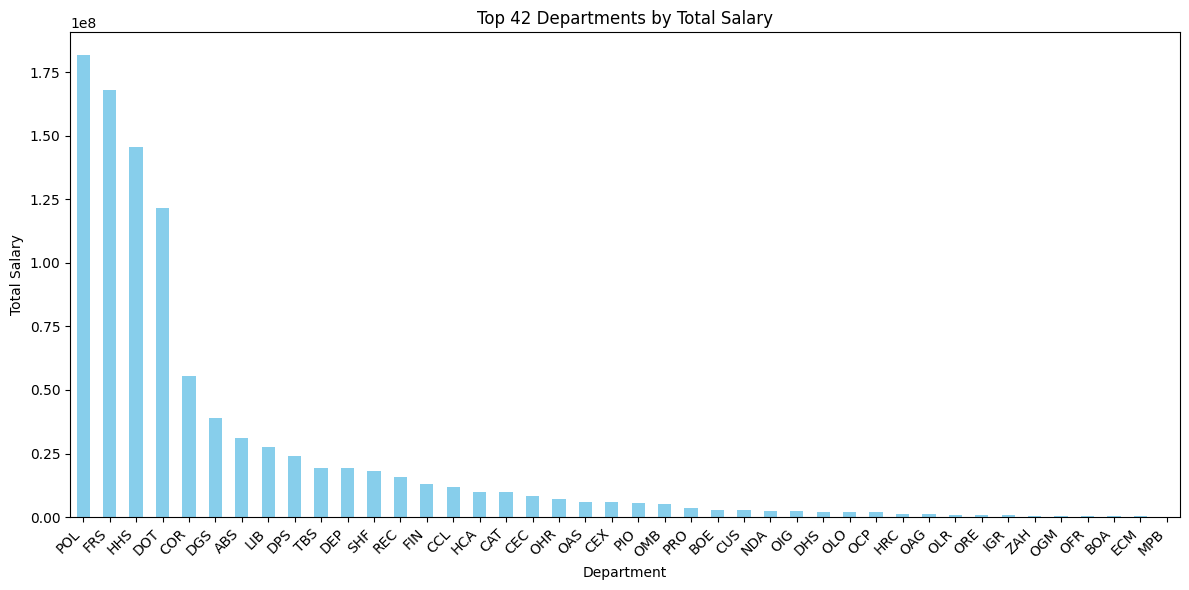

In [123]:
# Group data by Department and Division
highest_salary_depts = data.groupby('Department')['Total_Salary'].sum().sort_values(ascending=False).head(42)

# Creating the bar chart
plt.figure(figsize=(12, 6))
highest_salary_depts.plot(kind='bar', color='skyblue')
plt.title('Top 42 Departments by Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

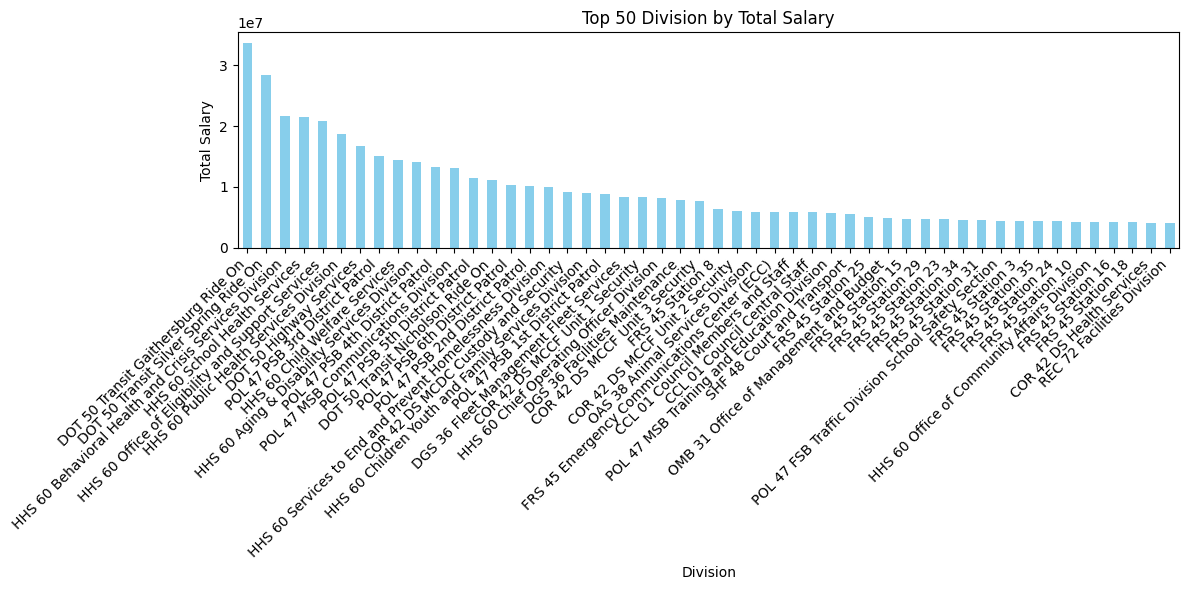

In [124]:
# Group data by Department and Division
highest_salary_depts = data.groupby('Division')['Total_Salary'].sum().sort_values(ascending=False).head(50)

# Creating the bar chart
plt.figure(figsize=(12, 6))
highest_salary_depts.plot(kind='bar', color='skyblue')
plt.title('Top 50 Division by Total Salary')
plt.xlabel('Division')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

# **1.3**

Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees
(i.e. ‘Base_Salary’) and explain the trends or patterns in these payments.

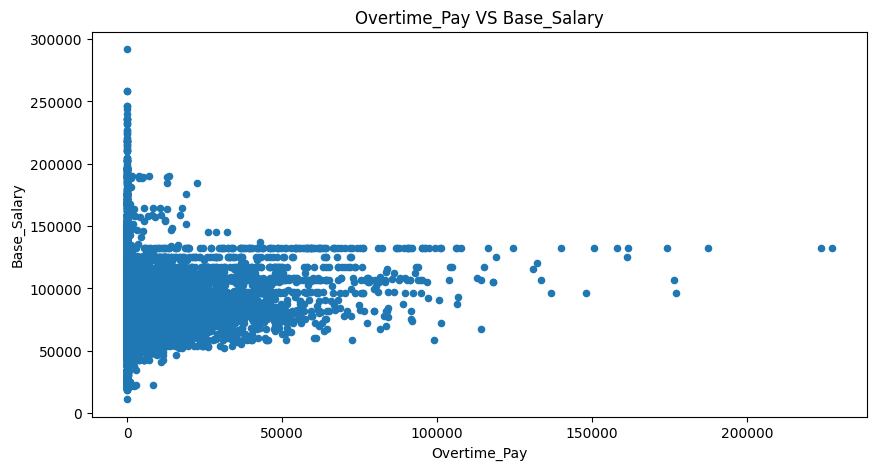

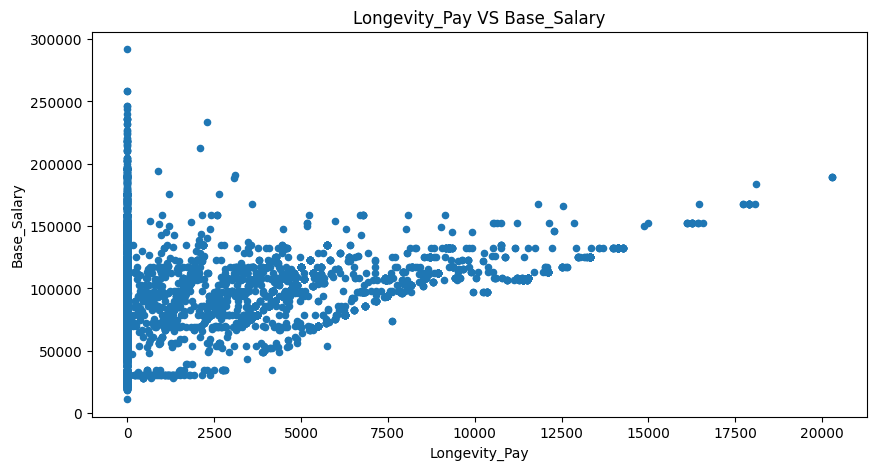

In [125]:
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='Base_Salary', figsize=(10,5), title=predictor+" VS "+ 'Base_Salary')

No insght to get from these plot. 
So it is best to run a statistical relationship using correlation to see if there is a significant correlation.

In [126]:
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay','Base_Salary']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,Overtime_Pay,Longevity_Pay,Base_Salary
Overtime_Pay,1.000000,0.228843,0.073841
Longevity_Pay,0.228843,1.000000,0.295502
Base_Salary,0.073841,0.295502,1.000000


<Axes: >

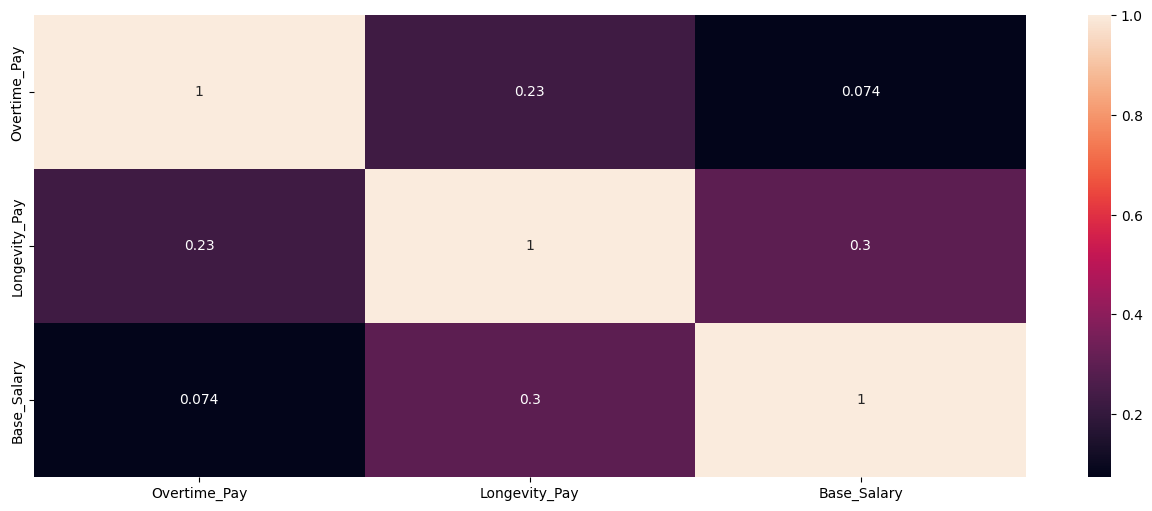

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the continuous columns
corr_matrix = data[['Overtime_Pay', 'Longevity_Pay', 'Base_Salary']].corr()

# Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True)

There is low correlation between overtime pay and base salary but also a low correlation longetivity pay with Base Salary. 

r = 0.0-0.3 is low correlation